**Testing**


# Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
##from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Test set Image Processing

In [3]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Deep Learning/UAS/Dataset/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


# Loading Model

In [4]:
cnn = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Deep Learning/UAS/trained_model.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 16 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


#Visualising and Performing Prediction on Single image

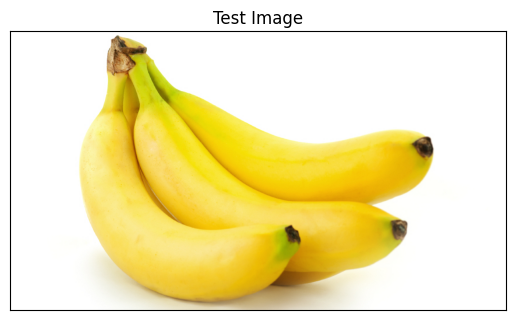

In [28]:
#Test Image Visualization
import cv2
image_path = '/content/drive/MyDrive/Colab Notebooks/Deep Learning/UAS/Dataset/test/banana/Image_4.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

#Testing Model

In [29]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [30]:
print(predictions)

[[1.5472988e-05 9.9903464e-01 1.4939832e-09 8.7298076e-08 4.0824401e-07
  4.1288522e-06 8.0731937e-09 5.8543519e-06 2.8239873e-08 1.6051882e-04
  8.1355114e-07 6.5702613e-07 5.6945306e-09 1.4091822e-07 2.7539436e-06
  7.8789803e-08 2.1466867e-06 5.5323489e-04 3.3552013e-07 1.4142788e-04
  1.8199826e-07 1.8465218e-05 1.7765466e-07 1.4690929e-05 5.2940070e-08
  2.0864281e-08 9.7932595e-10 9.2067276e-06 6.3589667e-08 5.0349261e-08
  2.5951758e-08 3.0501831e-05 4.0704798e-10 4.6921400e-10 1.4783926e-09
  3.9549031e-06]]


In [31]:
test_set.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [32]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

1


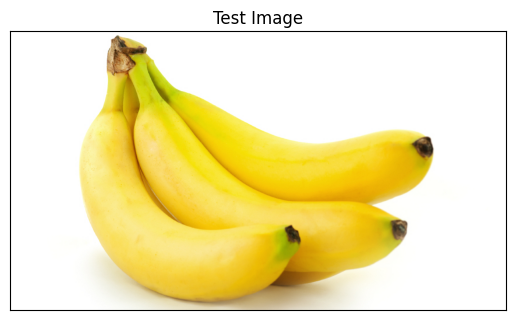

In [33]:
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [34]:
#Single image Prediction
print("It's a {}".format(test_set.class_names[result_index]))

It's a banana


# Unmount Drive

In [ ]:
from google.colab import drive
drive.flush_and_unmount()